<a href="https://colab.research.google.com/github/As2909/Pytorch-Zero-To-Mastery/blob/main/object_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ayulockin/synthetic_datasets
%cd synthetic_datasets/MNIST/
%mkdir images

!unzip -q MNIST_Converted_Training.zip -d images/
!unzip -q MNIST_Converted_Testing.zip -d images/

Cloning into 'synthetic_datasets'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 42 (delta 1), reused 1 (delta 1), pack-reused 39
Receiving objects: 100% (42/42), 42.06 MiB | 13.27 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/synthetic_datasets/MNIST


In [2]:
!pwd

/content/synthetic_datasets/MNIST


In [3]:
import pandas as pd
from os import path

R = "/content"
S = "synthetic_datasets"
M = "MNIST"
I = "images"

train_df = pd.read_csv(path.join(R, S, M, "training_data.csv"), header=None)
columns = ["path", "class_index", "xmin", "ymin", "xmax", "ymax"]
train_df.columns = columns
train_df.head()

,path,class_index,xmin,ymin,xmax,ymax
0,converted_training1.png,4,0.49,0.15,0.77,0.43
1,converted_training2.png,1,0.64,0.26,0.92,0.54
2,converted_training3.png,0,0.42,0.39,0.70,0.67
3,converted_training4.png,7,0.58,0.10,0.86,0.38
4,converted_training5.png,8,0.21,0.23,0.49,0.51


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   path         60000 non-null  object 
 1   class_index  60000 non-null  int64  
 2   xmin         60000 non-null  float64
 3   ymin         60000 non-null  float64
 4   xmax         60000 non-null  float64
 5   ymax         60000 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.7+ MB


In [5]:
test_df = pd.read_csv(path.join(R, S, M, "test_data.csv"), header=None)
columns = ["path", "class_index", "xmin", "ymin", "xmax", "ymax"]
test_df.columns = columns
test_df.head()

,path,class_index,xmin,ymin,xmax,ymax
0,converted_testing1.png,2,0.20,0.45,0.48,0.73
1,converted_testing2.png,0,0.02,0.03,0.30,0.31
2,converted_testing3.png,4,0.55,0.39,0.83,0.67
3,converted_testing4.png,8,0.38,0.42,0.66,0.70
4,converted_testing5.png,7,0.69,0.17,0.97,0.45


In [6]:
t = "MNIST_Converted_Training"
train_df["path"] = train_df["path"].apply(lambda x: path.join(R, S, M, I, t, x))

t = "MNIST_Converted_Testing"
test_df["path"] = test_df["path"].apply(lambda x: path.join(R, S, M, I, t, x))

In [7]:
train_df.head()

,path,class_index,xmin,ymin,xmax,ymax
0,/content/synthetic_datasets/MNIST/images/MNIST...,4,0.49,0.15,0.77,0.43
1,/content/synthetic_datasets/MNIST/images/MNIST...,1,0.64,0.26,0.92,0.54
2,/content/synthetic_datasets/MNIST/images/MNIST...,0,0.42,0.39,0.70,0.67
3,/content/synthetic_datasets/MNIST/images/MNIST...,7,0.58,0.10,0.86,0.38
4,/content/synthetic_datasets/MNIST/images/MNIST...,8,0.21,0.23,0.49,0.51


In [8]:
row_1 = train_df.iloc[0].to_numpy().tolist()
row_1

['/content/synthetic_datasets/MNIST/images/MNIST_Converted_Training/converted_training1.png',
 4,
 0.49,
 0.15,
 0.77,
 0.43]

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def load_image_for_vis(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=1)
  image = tf.image.grayscale_to_rgb(image)
  image = image.numpy().astype(np.uint8)
  return image

In [10]:
!pwd

/content/synthetic_datasets/MNIST


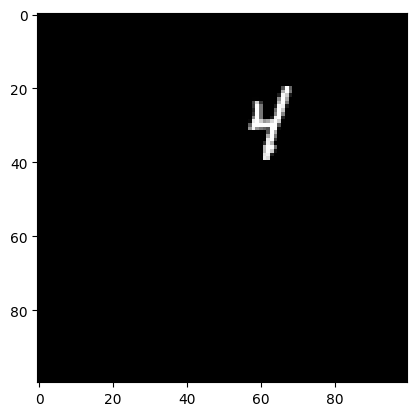

In [11]:
# Load and display the image
image_path = row_1[0]
image = load_image_for_vis(image_path)
plt.imshow(image)
plt.show()


49 15 77 43


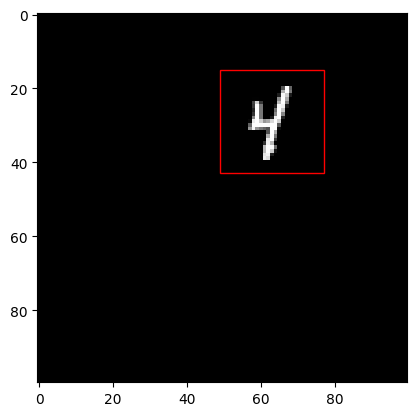

In [12]:
import matplotlib.patches as patches

im = load_image_for_vis(image_path)
fig, ax = plt.subplots()
ax.imshow(im)

x1, y1, x2, y2 = [int(v*100) for v in row_1[2:]]
print(x1, y1, x2, y2)
width = x2- x1
height = y2 - y1
rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor="r", facecolor="none")
ax.add_patch(rect)

plt.show()

In [13]:
len(train_df)

60000

In [14]:
len(test_df)

10000

In [15]:
train_df["class_index"].value_counts().sort_values(ascending=False)

class_index
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [16]:
val_df, test_df = test_df[:5000], test_df[5000:]
len(val_df), len(test_df)

(5000, 5000)

In [17]:
box_columns = ["xmin", "ymin", "xmax", "ymax"]
boxes_train = train_df[box_columns].to_numpy()
boxes_test = val_df[box_columns].to_numpy()
boxes_val = test_df[box_columns].to_numpy()

class_indexes_train = train_df["class_index"].to_numpy()
class_indexes_test = test_df["class_index"].to_numpy()
class_indexes_val = val_df["class_index"].to_numpy()


In [18]:
@tf.function
def load_image(image_path, label_dict):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=1)
  image = tf.image.grayscale_to_rgb(image)
  return (image, label_dict)

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    train_df["path"].tolist(),
    {"box": boxes_train,
    "class": class_indexes_train}))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [20]:
val_dataset = tf.data.Dataset.from_tensor_slices((
    val_df["path"].tolist(),
    {"box": boxes_val,
     "class": class_indexes_val}
))
val_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices((
    test_df["path"].tolist(),
    {"box": boxes_test,
     "class": class_indexes_test}
))
test_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [22]:
iterator = iter(train_dataset)
next(iterator)

(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/synthetic_datasets/MNIST/images/MNIST_Converted_Training/converted_training1.png'>,
 {'box': <tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.49, 0.15, 0.77, 0.43])>,
  'class': <tf.Tensor: shape=(), dtype=int64, numpy=4>})

In [23]:
load_image(*next(iterator))[0].numpy().shape

(100, 100, 3)

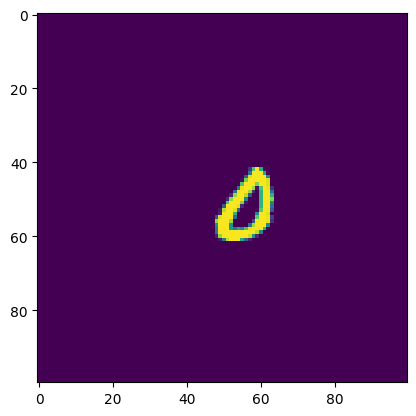

In [24]:

plt.imshow(load_image(*next(iterator))[0].numpy()[:, :, 0])

In [25]:
from tensorflow.data import AUTOTUNE

SHUFFLE_VAL = len(train_dataset)
BATCH_SIZE = 4

train_dataset = train_dataset.shuffle(SHUFFLE_VAL).map(load_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_dataset = val_dataset.map(load_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_dataset = test_dataset.map(load_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)

train_dataset, val_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), {'box': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.int64, name=None)})>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), {'box': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.int64, name=None)})>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), {'box': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.int64, name=None)})>)

In [26]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
model = EfficientNetV2S(weights="imagenet",
                        include_top=False,
                        input_shape=(100, 100, 3))
model.summary()

82420632/82420632 [==============================] - 1s 0us/step
Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 100, 100, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 50, 50, 24)           648       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 50, 50, 24)           96        ['stem_conv[0][0]']           
 n)               

In [27]:
for layer in model.layers[:-5]:
  layer.trainable = False

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

model_1 = Sequential([
    model,
    GlobalAveragePooling2D(),
    Dense(64, activation="relu"),
])
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 4, 4, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
Total params: 20413344 (77.87 MB)
Trainable params: 412224 (1.57 MB)
Non-trainable params: 20001120 (76.30 MB)
_________________________________________________________________


In [29]:
from tensorflow.keras.models import Model

img_input =Input((100, 100, 3))
feature_vector = model_1(img_input)

class_output_path = Dense(128, activation="relu")(feature_vector)
class_output_path = Dense(10, activation="softmax", name="class")(class_output_path)

box_output_path = Dense(128, activation="relu")(feature_vector)
box_output_path = Dense(4, activation="linear", name="box")(box_output_path)

model_2 = Model(inputs=img_input, outputs=[class_output_path,
                                           box_output_path])
model_2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 64)                   2041334   ['input_2[0][0]']             
                                                          4                                       
                                                                                                  
 dense_1 (Dense)             (None, 128)                  8320      ['sequential[0][0]']          
                                                                                                  
 dense_2 (Dense)             (None, 128)                  8320      ['sequential[0][0]']      

In [30]:
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, MeanAbsoluteError

model_2.compile(loss={"class": SparseCategoricalCrossentropy(),
                      "box": MeanSquaredError()},
                optimizer=Adam(),
                metrics={"class":["accuracy"],
                         "box": [MeanAbsoluteError()]},
                loss_weights={"class": 1, "box": 25})


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=1,
                   monitor="val_loss")

In [32]:
model_2.fit(train_dataset, validation_data=val_dataset, epochs=10, callbacks=[es])

Epoch 1/10
12143/15000 [=======================>......] - ETA: 1:21 - loss: 0.8167 - class_loss: 0.6887 - box_loss: 0.0051 - class_accuracy: 0.7660 - box_mean_absolute_error: 0.0503

KeyboardInterrupt: 

In [ ]:
#model_2.save("model")

In [ ]:
#!zip -r model.zip model

In [37]:
!gdown 18jOWepefhg791DpL2buCJ5jRKhJDDeL3

Downloading...
From (original): https://drive.google.com/uc?id=18jOWepefhg791DpL2buCJ5jRKhJDDeL3
From (redirected): https://drive.google.com/uc?id=18jOWepefhg791DpL2buCJ5jRKhJDDeL3&confirm=t&uuid=e1761898-d72d-45b3-8295-72d554c5f3cb
To: /content/synthetic_datasets/MNIST/model.zip
100% 79.5M/79.5M [00:02<00:00, 37.9MB/s]


In [38]:
!unzip model.zip

Archive:  model.zip
   creating: model/
  inflating: model/keras_metadata.pb  
   creating: model/variables/
  inflating: model/variables/variables.data-00000-of-00001  
  inflating: model/variables/variables.index  
  inflating: model/saved_model.pb    
   creating: model/assets/


In [39]:
model_3 = tf.keras.models.load_model("model")

In [40]:
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 64)                   2041334   ['input_7[0][0]']             
                                                          4                                       
                                                                                                  
 dense_7 (Dense)             (None, 64)                   4160      ['sequential_2[0][0]']        
                                                                                                  
 dense_8 (Dense)             (None, 64)                   4160      ['sequential_2[0][0]']  

34 23 62 51


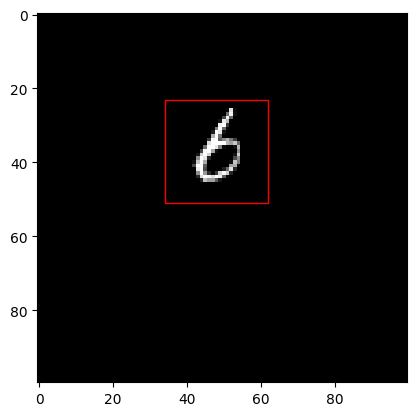

In [43]:
row_1 = test_df.iloc[0].to_numpy().tolist()

im = load_image_for_vis(row_1[0])
fig, ax = plt.subplots()
ax.imshow(im)

x1, y1, x2, y2 = [int(v*100) for v in row_1[2:]]
print(x1, y1, x2, y2)
width = x2- x1
height = y2 - y1
rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor="r", facecolor="none")
ax.add_patch(rect)
plt.show()

In [44]:
np.array([load_image_for_vis(row_1[0])]).shape

(1, 100, 100, 3)

In [45]:
img = np.array([load_image_for_vis(row_1[0])])

pred = model_3.predict(img)
pred

1/1 [==============================] - 5s 5s/step


[array([[5.1665530e-02, 2.0884341e-05, 5.7859455e-05, 1.6078286e-07,
         2.2828730e-04, 2.3386997e-04, 9.4761312e-01, 2.0775728e-08,
         1.4026399e-04, 3.9971994e-05]], dtype=float32),
 array([[0.34916306, 0.25215805, 0.6291747 , 0.5321541 ]], dtype=float32)]

In [46]:
pred_class = np.argmax(pred[0].tolist()[0])
pred_class

6

In [48]:
pred_box = pred[1].tolist()[0]
pred_box

[0.3491630554199219,
 0.2521580457687378,
 0.6291747093200684,
 0.5321540832519531]

34 25 62 53


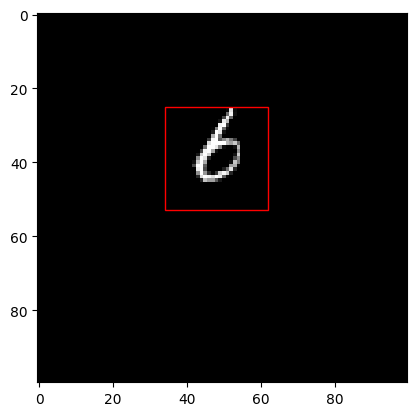

In [50]:
im = load_image_for_vis(row_1[0])
fig, ax = plt.subplots()
ax.imshow(im)

x1, y1, x2, y2 = [int(v*100) for v in pred_box]
print(x1, y1, x2, y2)
width = x2- x1
height = y2 - y1
rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor="r", facecolor="none")
ax.add_patch(rect)
plt.show()

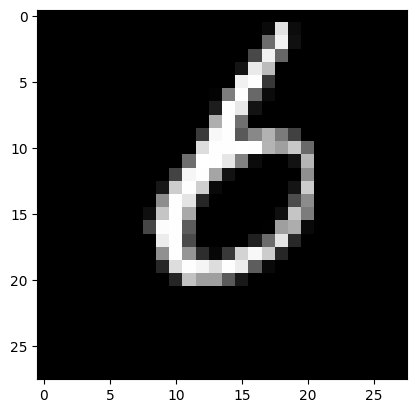

In [51]:
plt.imshow(im[y1:y2, x1:x2])